<a href="https://colab.research.google.com/github/benbaz-2/comp551/blob/main/assignment_1_regression_aziz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Installing and importing packages

In [204]:
!pip install ucimlrepo;
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;
from sklearn.metrics import r2_score;
from sklearn.metrics import mean_squared_error;
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler;
import time;
import pdb

###Loading the data

In [205]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
infrared_thermography_temperature = fetch_ucirepo(id=925)

# data (as pandas dataframes)
X = infrared_thermography_temperature.data.features
y = infrared_thermography_temperature.data.targets

# metadata
print(infrared_thermography_temperature.metadata)

# variable information
print(infrared_thermography_temperature.variables)


{'uci_id': 925, 'name': 'Infrared Thermography Temperature', 'repository_url': 'https://archive.ics.uci.edu/dataset/925/infrared+thermography+temperature+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/925/data.csv', 'abstract': 'The Infrared Thermography Temperature Dataset contains temperatures read from various locations of inferred images about patients, with the addition of oral temperatures measured for each individual. The 33 features consist of gender, age, ethnicity, ambiant temperature, humidity, distance, and other temperature readings from the thermal images. The dataset is intended to be used in a regression task to predict the oral temperature using the environment information as well as the thermal image readings. ', 'area': 'Health and Medicine', 'tasks': ['Regression'], 'characteristics': ['Tabular'], 'num_instances': 1020, 'num_features': 33, 'feature_types': ['Real', 'Categorical'], 'demographics': ['Gender', 'Age', 'Ethnicity'], 'target_col': ['aveO

###Data cleaning and exploratory data analysis

In [206]:
#Taking a look at the data
pd.set_option('display.max_columns', None);
X.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,34.7625,35.0325,35.3375,35.3375,34.4850,35.3775,34.7850,34.4650,35.3775,35.3375,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,34.5600,34.5375,34.3500,34.5750,34.3225,34.2400,34.7400,34.7150,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,35.5025,35.5025,35.2950,35.5300,35.3575,35.0925,35.7175,35.6825,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,35.5950,35.5950,35.3275,35.6125,34.9100,35.1700,35.6125,35.5950,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,35.6400,35.6400,35.0775,35.6675,35.3550,35.1200,35.6650,35.6475,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


In [207]:
# Checking number of features and instances
X.shape

(1020, 33)

In [208]:
#Checking the dimensions of y
y.shape

(1020, 2)

In [209]:
#Only need aveoralm
y = y['aveOralM']

In [210]:
# Checking data types
# gender, age, and ethnicity are listed as objects so they may have different types or contain nan values
X.dtypes

,0
Gender,object
Age,object
Ethnicity,object
T_atm,float64
Humidity,float64
Distance,float64
T_offset1,float64
Max1R13_1,float64
Max1L13_1,float64
aveAllR13_1,float64


In [211]:
# Computing descriptive statistics for numerical data
# It seems that distance is missing two values
# Distance also seems to have a very big outlier
X.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
count,1020.000000,1020.000000,1018.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,24.115392,28.723039,0.729784,0.968648,35.596533,35.611474,34.888475,35.011345,35.659921,35.587143,35.547315,35.689762,35.640851,35.610869,35.468624,35.670962,35.253563,35.208961,35.787509,35.758025,34.573865,34.567782,34.565340,34.487701,34.577293,35.421555,35.094144,36.084785,35.805519,35.838277
std,1.336338,13.071627,2.456486,0.362587,0.574888,0.549760,0.718613,0.633836,0.553897,0.569278,0.568828,0.553594,0.541169,0.545645,0.566434,0.540748,0.605968,0.584393,0.533453,0.533313,0.672461,0.669410,0.678663,0.668065,0.728678,0.523477,0.576045,0.491821,0.559258,0.559316
min,20.200000,9.900000,0.540000,-0.590000,33.897500,34.122500,31.770000,32.902500,33.985000,33.825000,33.932500,34.002500,34.105000,34.105000,33.730000,34.122500,33.617500,33.385000,34.375000,34.352500,31.050000,31.452500,31.657500,31.280000,31.150000,33.407500,32.440000,34.892500,33.802500,33.835000
25%,23.400000,17.600000,0.600000,0.772500,35.247500,35.271875,34.456250,34.651250,35.332500,35.249375,35.210000,35.360000,35.309375,35.278750,35.127500,35.331875,34.886250,34.863750,35.455000,35.426875,34.213125,34.180000,34.177500,34.096875,34.225000,35.116875,34.756458,35.775000,35.474375,35.500000
50%,24.000000,26.300000,0.620000,0.940000,35.548750,35.575000,34.915000,34.997500,35.602500,35.533750,35.482500,35.631250,35.597500,35.572500,35.425000,35.626250,35.203750,35.167500,35.713750,35.686250,34.605000,34.597500,34.602500,34.512917,34.622500,35.391250,35.100000,36.027500,35.790000,35.825000
75%,24.700000,36.200000,0.700000,1.140000,35.872500,35.883125,35.300000,35.363125,35.910625,35.855625,35.808125,35.940625,35.895000,35.863125,35.755000,35.922500,35.562500,35.498125,36.030625,36.002500,34.965625,34.968125,34.965000,34.878125,35.012500,35.675000,35.415000,36.280000,36.087500,36.120625
max,29.100000,61.200000,79.000000,2.875000,38.405000,38.042500,37.575000,37.680000,38.385000,38.380000,38.330000,38.407500,38.042500,38.037500,37.960000,38.075000,38.155000,37.827500,38.407500,38.382500,37.125000,37.075000,37.165000,37.212500,37.367500,38.002500,37.632500,38.807500,38.417500,38.455000


In [212]:
# Checking value counts for categorical variables
# Mostly young people in this dataset. Results may not generalize to older populations
X['Age'].value_counts()

,count
Age,
18-20,534
21-25,355
26-30,67
31-40,31
51-60,11
21-30,10
41-50,9
>60,3


In [213]:
# Mostly white people in this dataset. Results may not generalize to other ethnicities
X['Ethnicity'].value_counts()

,count
Ethnicity,
White,506
Asian,260
Black or African-American,143
Hispanic/Latino,57
Multiracial,50
American Indian or Alaskan Native,4


In [214]:
# This looks relatively balanced
X['Gender'].value_counts()

,count
Gender,
Female,606
Male,414


In [215]:
# Checking for nan values
# As observed previously, distance has two missing values
X.isna().sum()

,0
Gender,0
Age,0
Ethnicity,0
T_atm,0
Humidity,0
Distance,2
T_offset1,0
Max1R13_1,0
Max1L13_1,0
aveAllR13_1,0


In [216]:
# Finding the rows with nan values
X[X['Distance'].isna()]

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
902,Female,18-20,White,23.9,15.3,NaN,0.8100,35.735,35.4150,35.0525,34.6275,35.7000,35.7000,35.5200,35.7350,35.4450,35.4100,35.290,35.460,35.3150,35.010,35.735,35.6975,34.5750,34.73,34.675,34.7075,34.77,35.3900,35.1925,36.0075,35.8675,35.895
903,Male,18-20,White,23.9,15.3,NaN,0.7775,35.620,35.6275,34.3650,33.8125,35.6675,35.5975,35.5925,35.7025,35.6425,35.5975,35.505,35.685,35.3475,35.295,35.725,35.6950,33.4375,33.59,33.840,33.1125,33.35,34.8675,34.4825,36.3350,36.0425,36.080


In [217]:
#removing nan values
X = X.drop(index=[902, 903])
y = y.drop(index=[902, 903])

In [218]:
#Checking out the distribution of y
y.describe()

,aveOralM
count,1018.000000
mean,37.028163
std,0.509743
min,35.540000
25%,36.752500
50%,36.940000
75%,37.140000
max,40.340000


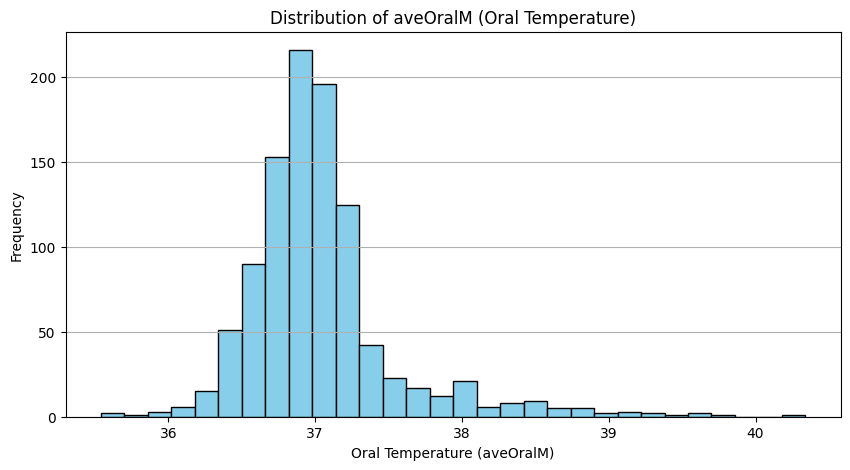

In [219]:
# Looks slightly right skewed
# Visualize the distribution of the target variable
plt.figure(figsize=(10, 5))
plt.hist(y, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of aveOralM (Oral Temperature)')
plt.xlabel('Oral Temperature (aveOralM)')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()

In [220]:
# Removing outlier in distance column
X[X['Distance'] > 2]

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
97,Female,41-50,White,25.8,31.5,79.0,1.3075,35.2125,35.265,33.7725,33.975,35.51,35.21,35.5,35.54,35.29,35.29,35.125,35.3225,34.78,34.755,35.54,35.51,34.265,34.475,34.4875,34.095,34.3525,35.1125,34.9425,36.2425,36.08,36.1225


In [221]:
X = X.drop(index=97)
y = y.drop(index=97)

In [222]:
# Checking out X distributions
X.hist(figsize=(20,15))

array([[<Axes: title={'center': 'T_atm'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'T_offset1'}>,
        <Axes: title={'center': 'Max1R13_1'}>],
       [<Axes: title={'center': 'Max1L13_1'}>,
        <Axes: title={'center': 'aveAllR13_1'}>,
        <Axes: title={'center': 'aveAllL13_1'}>,
        <Axes: title={'center': 'T_RC1'}>,
        <Axes: title={'center': 'T_RC_Dry1'}>],
       [<Axes: title={'center': 'T_RC_Wet1'}>,
        <Axes: title={'center': 'T_RC_Max1'}>,
        <Axes: title={'center': 'T_LC1'}>,
        <Axes: title={'center': 'T_LC_Dry1'}>,
        <Axes: title={'center': 'T_LC_Wet1'}>],
       [<Axes: title={'center': 'T_LC_Max1'}>,
        <Axes: title={'center': 'RCC1'}>,
        <Axes: title={'center': 'LCC1'}>,
        <Axes: title={'center': 'canthiMax1'}>,
        <Axes: title={'center': 'canthi4Max1'}>],
       [<Axes: title={'center': 'T_FHCC1'}>,
        <Axes: title={'cente

Error in callback <function flush_figures at 0x7915279b41f0> (for post_execute):


KeyboardInterrupt: 

<Axes: xlabel='Age', ylabel='aveOralM'>

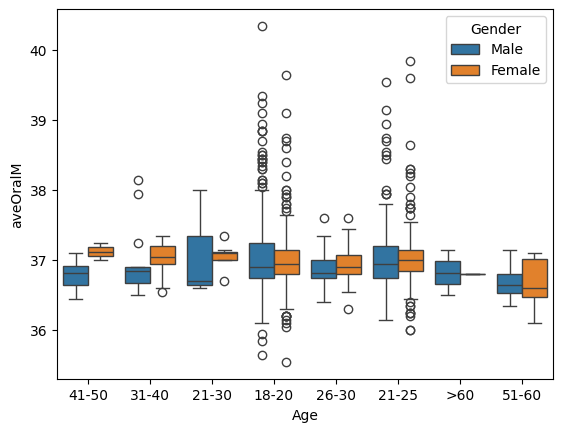

In [223]:
sns.boxplot(x=X['Age'], y=y, hue=X['Gender'])

<Axes: xlabel='Ethnicity', ylabel='aveOralM'>

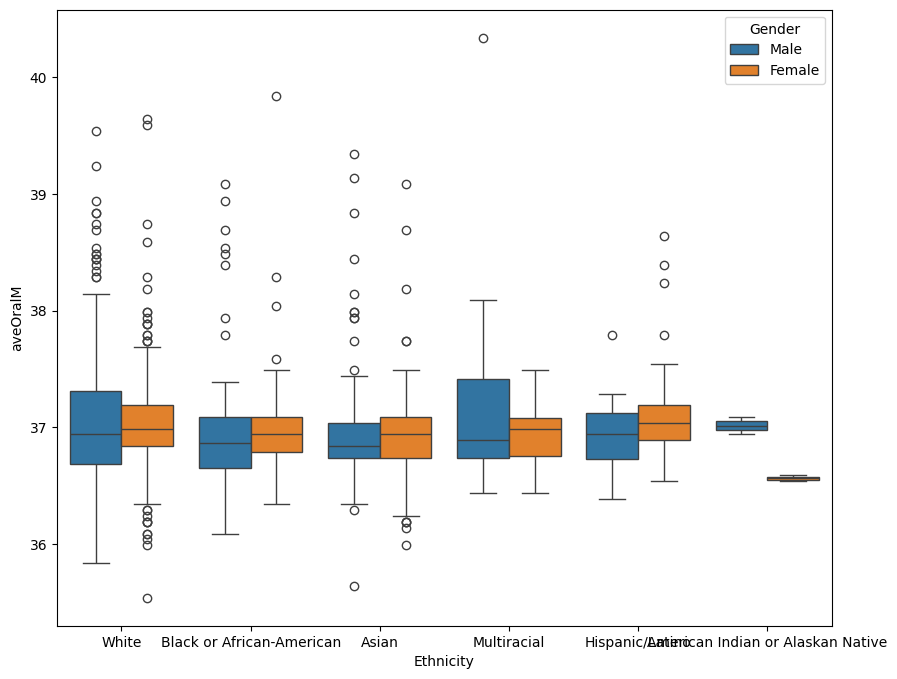

In [224]:
plt.figure(figsize=(10,8))
sns.boxplot(x=X['Ethnicity'], y=y, hue=X['Gender'])

<Axes: >

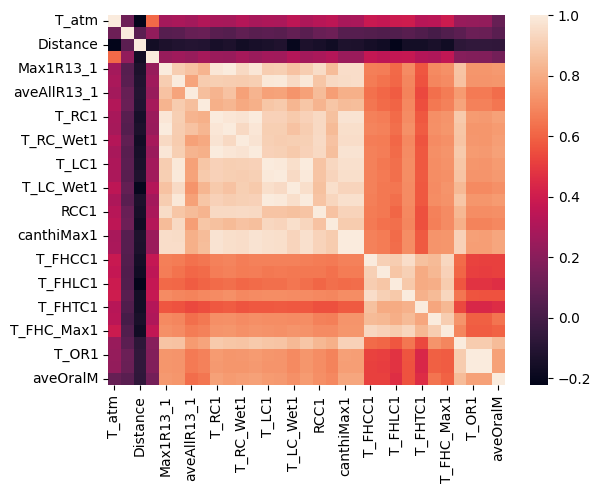

In [225]:
numerical = X.select_dtypes(include=np.number)
numerical['aveOralM'] = y
sns.heatmap(numerical.corr())

In [226]:
X.head()

,Gender,Age,Ethnicity,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1
0,Male,41-50,White,24.0,28.0,0.8,0.7025,35.0300,35.3775,34.4000,34.9175,34.9850,34.9850,34.7625,35.0325,35.3375,35.3375,34.4850,35.3775,34.7850,34.4650,35.3775,35.3375,33.5775,33.4775,33.3725,33.4925,33.0025,34.5300,34.0075,35.6925,35.6350,35.6525
1,Female,31-40,Black or African-American,24.0,26.0,0.8,0.7800,34.5500,34.5200,33.9300,34.2250,34.7100,34.6325,34.6400,34.7425,34.5600,34.5375,34.3500,34.5750,34.3225,34.2400,34.7400,34.7150,34.0325,34.0550,33.6775,33.9700,34.0025,34.6825,34.6600,35.1750,35.0925,35.1075
2,Female,21-30,White,24.0,26.0,0.8,0.8625,35.6525,35.5175,34.2775,34.8000,35.6850,35.6675,35.6150,35.7175,35.5025,35.5025,35.2950,35.5300,35.3575,35.0925,35.7175,35.6825,34.9000,34.8275,34.6475,34.8200,34.6700,35.3450,35.2225,35.9125,35.8600,35.8850
3,Female,21-30,Black or African-American,24.0,27.0,0.8,0.9300,35.2225,35.6125,34.3850,35.2475,35.2075,35.2000,35.1175,35.2250,35.5950,35.5950,35.3275,35.6125,34.9100,35.1700,35.6125,35.5950,34.4400,34.4225,34.6550,34.3025,34.9175,35.6025,35.3150,35.7200,34.9650,34.9825
4,Male,18-20,White,24.0,27.0,0.8,0.8950,35.5450,35.6650,34.9100,35.3675,35.6025,35.4750,35.5700,35.6400,35.6400,35.6400,35.0775,35.6675,35.3550,35.1200,35.6650,35.6475,35.0900,35.1600,34.3975,34.6700,33.8275,35.4175,35.3725,35.8950,35.5875,35.6175


In [227]:
# scaling data
for n in X.columns:
    if n != 'Gender' and n != 'Age' and n!= 'Ethnicity':
      values = np.array(X[n])
      mean = np.mean(values)
      std = np.std(values)
      X.loc[:, n] = (values - mean) / std

In [228]:
# One hot encoding
X = pd.get_dummies(X, drop_first=True)

# converting to ints
X[X.select_dtypes(include=bool).columns] = X[X.select_dtypes(include=bool).columns].astype(int)

In [229]:
X.describe()

,T_atm,Humidity,Distance,T_offset1,Max1R13_1,Max1L13_1,aveAllR13_1,aveAllL13_1,T_RC1,T_RC_Dry1,T_RC_Wet1,T_RC_Max1,T_LC1,T_LC_Dry1,T_LC_Wet1,T_LC_Max1,RCC1,LCC1,canthiMax1,canthi4Max1,T_FHCC1,T_FHRC1,T_FHLC1,T_FHBC1,T_FHTC1,T_FH_Max1,T_FHC_Max1,T_Max1,T_OR1,T_OR_Max1,Gender_Male,Age_21-25,Age_21-30,Age_26-30,Age_31-40,Age_41-50,Age_51-60,Age_>60,Ethnicity_Asian,Ethnicity_Black or African-American,Ethnicity_Hispanic/Latino,Ethnicity_Multiracial,Ethnicity_White
count,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1.017000e+03,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000,1017.000000
mean,1.830503e-15,-2.235729e-16,1.397331e-16,-9.082651e-17,2.012156e-15,7.999719e-15,-3.392021e-15,-3.681967e-15,2.668902e-15,6.567455e-16,-1.475581e-14,6.371829e-15,1.229651e-15,1.103891e-15,3.842660e-15,7.252147e-15,-2.354502e-15,-2.249703e-15,-1.632082e-14,4.750925e-16,-2.459302e-15,2.613009e-15,3.493327e-16,-2.794662e-16,-3.591140e-15,1.070355e-14,-4.499405e-15,-1.079438e-14,4.700272e-15,-1.334451e-15,0.406096,0.349066,0.009833,0.065880,0.030482,0.007866,0.010816,0.002950,0.255654,0.140610,0.056047,0.049164,0.494592
std,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,1.000492e+00,0.491345,0.476909,0.098721,0.248194,0.171993,0.088386,0.103488,0.054259,0.436443,0.347789,0.230126,0.216317,0.500217
min,-2.928504e+00,-1.441914e+00,-1.667323e+00,-4.297327e+00,-2.953627e+00,-2.707390e+00,-4.343725e+00,-3.338791e+00,-3.021215e+00,-3.093523e+00,-2.836131e+00,-3.045122e+00,-2.836999e+00,-2.758704e+00,-3.067961e+00,-2.862533e+00,-2.698638e+00,-3.120144e+00,-2.646238e+00,-2.633872e+00,-5.245126e+00,-4.655597e+00,-4.283940e+00,-4.810142e+00,-4.707462e+00,-3.848140e+00,-4.606917e+00,-2.421646e+00,-3.577800e+00,-3.577916e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-5.343213e-01,-8.528065e-01,-7.806224e-01,-5.408226e-01,-6.070660e-01,-6.170810e-01,-5.985649e-01,-5.636073e-01,-5.907461e-01,-5.922245e-01,-5.924725e-01,-5.952764e-01,-6.119194e-01,-6.160503e-01,-6.026221e-01,-6.264660e-01,-6.042106e-01,-5.891673e-01,-6.234430e-01,-6.245922e-01,-5.360534e-01,-5.806844e-01,-5.722509e-01,-5.871341e-01,-4.831196e-01,-5.728176e-01,-5.853185e-01,-6.287144e-01,-5.939996e-01,-6.033225e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-8.541195e-02,-1.871913e-01,-4.850554e-01,-7.901380e-02,-8.560789e-02,-6.723883e-02,3.491014e-02,-2.596500e-02,-1.037505e-01,-9.635294e-02,-1.182746e-01,-1.080143e-01,-8.103951e-02,-7.123031e-02,-7.780050e-02,-8.130911e-02,-8.472665e-02,-7.185613e-02,-1.411563e-01,-1.374941e-01,5.165079e-02,4.306480e-02,5.372848e-02,3.613740e-02,6.036971e-02,-5.716908e-02,9.027804e-03,-1.157228e-01,-3.118685e-02,-2.269629e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.383156e-01,5.702328e-01,6.972127e-01,4.723997e-01,4.793051e-01,4.962358e-01,5.709275e-01,5.551631e-01,4.553927e-01,4.741187e-01,4.613006e-01,4.559465e-01,4.683058e-01,4.644331e-01,5.043546e-01,4.638478e-01,5.089693e-01,4.967586e-01,4.581902e-01,4.573276e-01,5.835603e-01,5.995836e-01,5.876521e-01,5.857156e-01,5.958498e-01,4.

###Initializing the model

In [266]:
import numpy as np
import pandas as pd
import time

class LinearRegression:
    def __init__(self, add_bias=True, learning_rate=0.004, epsilon=0.12, max_iters=1e5):
        self.add_bias = add_bias  # Store whether to add bias term
        self.learning_rate = learning_rate  # Store learning rate for gradient descent
        self.epsilon = epsilon  # Store convergence threshold
        self.max_iters = max_iters  # Store maximum iterations for fitting

    def fit(self, x, y, batch_size=False, verbose=True, get_time=True):
        # Ensure x is a 2D array
        if x.ndim == 1:
            x = x[:, None]

        N = x.shape[0]  # Number of samples

        # Add a bias term to the input features if specified
        if self.add_bias:
            x = np.column_stack((x, np.ones(N)))  # Append a column of ones for the bias term

        self.w = np.zeros((x.shape[1], 1))  # Initialize weights to zero

        # Track time taken for fitting if required
        if get_time:
            start = time.time()

        # If batch_size is False, use the normal equation method for fitting
        if not batch_size:
            self.w = np.linalg.lstsq(x, y, rcond=None)[0]  # Solve for weights using least squares method
        else:
            g = np.inf  # Initialize gradient to infinity for the convergence check
            t = 0  # Initialize iteration counter

            # Loop until convergence criteria are met
            while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
                # Randomly sample a mini-batch from the data
                sampled_data = pd.DataFrame(np.column_stack((x, y))).sample(n=batch_size, replace=False)
                x_batch = np.array(sampled_data.iloc[:, :-1])  # Features for the batch
                y_batch = np.array(sampled_data.iloc[:, -1:])  # Targets for the batch

                g = self.gradient(x_batch, y_batch)  # Calculate the gradient
                self.w = self.w - self.learning_rate * g  # Update weights using gradient descent
                t += 1  # Increment the iteration counter

            self.num_iter = t
            if verbose:
                print(f'Number of iterations: {t}')  # Print the number of iterations performed

        if get_time:
            end = time.time()
            self.time = end - start  # Store the time taken for fitting
            print(f'Time taken: {self.time} seconds')  # Print the duration of the fitting process
        return self  # Return the fitted model

    def gradient(self, x, y):
        yh = x @ self.w  # Predicted values (y-hat) using current weights
        g = 2 * x.T @ (yh - y) / x.shape[0]  # Compute the gradient
        gs.append(np.linalg.norm(g))
        return g  # Return the computed gradient

    def predict(self, x):
        # Ensure x is a 2D array
        if x.ndim == 1:
            x = x[:, None]

        N = x.shape[0]  # Number of samples

        # Add a bias term to the input features if specified
        if self.add_bias:
            x = np.column_stack((x, np.ones(N)))  # Append a column of ones for the bias term

        yh = x @ self.w  # Calculate predicted values
        return yh  # Return the predicted values


### Fitting the model to our data

In [231]:
# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train = x_train.to_numpy()
x_test = x_test.to_numpy()
y_train = y_train.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

In [232]:
# Training the model
model = LinearRegression()
gs = []
model.fit(x_train, y_train, batch_size=64);

Time taken: 15.405578374862671 seconds
Number of iterations: 11907


11907 0.11054414904309319


Text(0.5, 1.0, 'Gradient Norm vs Iteration')

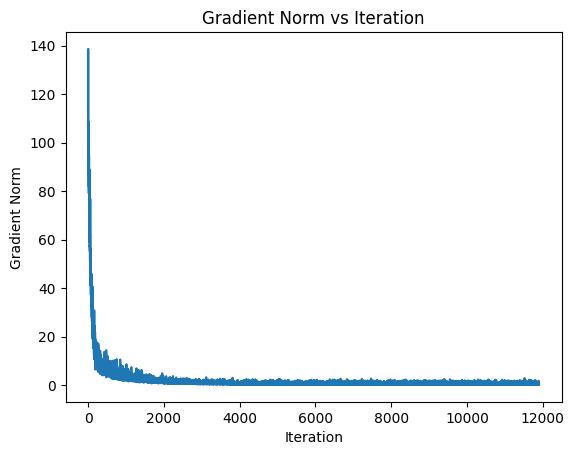

In [233]:
plt.plot(gs)
print(len(gs), min(gs))
plt.xlabel('Iteration')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norm vs Iteration')

### Assessing model performance

In [234]:
# Calculating cost function for test and train sets
cost_train = np.mean((y_train - model.predict(x_train)) ** 2)
cost_test = np.mean((y_test - model.predict(x_test)) ** 2)

In [235]:
#similar results, good!
# For mini batch not similar results...
cost_train, cost_test

(0.15363930113114563, 0.40178616490361013)

In [236]:
# Calculating RMSE
cost_train ** 0.5, cost_test ** 0.5

(0.39196849507472614, 0.6338660464984776)

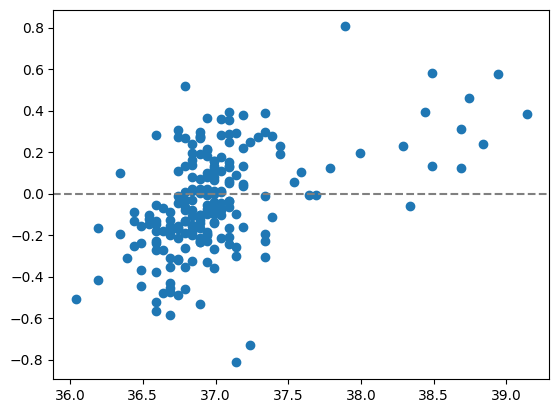

In [237]:
# calculating residuals
residuals = y_test - yh

# interestingly, our model tends to underestimate temperature when someone has a fever
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='gray', linestyle='--')

In [241]:
# Create a correlation plot
sns.scatterplot(x=y_test[:,1], y=yh[:,1])

IndexError: index 1 is out of bounds for axis 1 with size 1

In [ ]:
# Calculate variance explained and correlation coefficient
r2 = r2_score(y_test, yh)
print(f"variance explained: {r2}\npearson correlation: {r2 ** 0.5}")

In [ ]:
# Taking a look at the weights
weights = pd.DataFrame(model.w, index=(list(X.columns)) + ['Bias'], columns=['weights'])
weights.sort_values('weights', ascending=False)

In [ ]:
# Taking a look at the effect of size of training data

y_train_costs = []                                                                          # average value of cost function in training set
y_test_costs = []                                                                           # average value of cost function in test set
train_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]                                  # size of training set

for i in train_size:
  x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=1-i, random_state=42) # Train-test split
  model = LinearRegression()                                                                # Initialize model
  model.fit(x_train, y_train)                                                               # Fit model
  yh_train = model.predict(x_test)
  yh_test = model.predict(x_test)

  cost_train = np.mean((y_train - model.predict(x_train)) ** 2)                             # calculating mean l2 loss
  cost_test = np.mean((y_test - model.predict(x_test)) ** 2)
  y_train_costs.append(cost_train)                                                          # appending to list
  y_test_costs.append(cost_test)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))                                       # Plotting l2 loss as a function of training set size
ax1.plot(train_size, y_train_costs, label='train')                                          # for both train and test sets
ax2.plot(train_size, y_test_costs, label='test')
ax1.set_xlabel('train size')
ax2.set_xlabel('train size')
ax1.set_ylabel('loss')
ax2.set_ylabel('loss')
ax1.set_title('train')
ax2.set_title('test')

### Mini-batch Stochastic Gradient Descent

In [289]:
# Minibatch SGD
# need to complete this

sizes = [2, 4, 8, 16, 32, 64, 128]
yhs_batch = []
gss_batch = []
t_batch = []
n_iter_batch = []

for s in sizes:
  gs = []
  model = LinearRegression()
  model.fit(x_train, y_train, batch_size=s)
  yh = model.predict(x_test)
  yhs_batch.append((np.mean((y_test - yh) ** 2)) ** 0.5)
  gss_batch.append(gs)
  t_batch.append(model.time)
  n_iter_batch.append(model.num_iter)

Number of iterations: 3160
Time taken: 2.1583917140960693 seconds
Number of iterations: 4945
Time taken: 2.491506814956665 seconds
Number of iterations: 65981
Time taken: 41.356528520584106 seconds
Number of iterations: 12743
Time taken: 6.556509017944336 seconds
Number of iterations: 11793
Time taken: 7.015207529067993 seconds
Number of iterations: 13050
Time taken: 7.071601629257202 seconds
Number of iterations: 5944
Time taken: 3.8896329402923584 seconds


<BarContainer object of 7 artists>

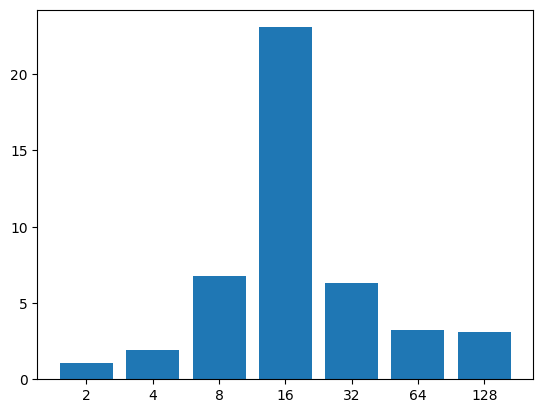

In [243]:
# Plotting time
plt.bar(['2', '4', '8', '16', '32', '64', '128'], [1.05, 1.89, 6.75, 23.07, 6.32, 3.24, 3.08])

<BarContainer object of 7 artists>

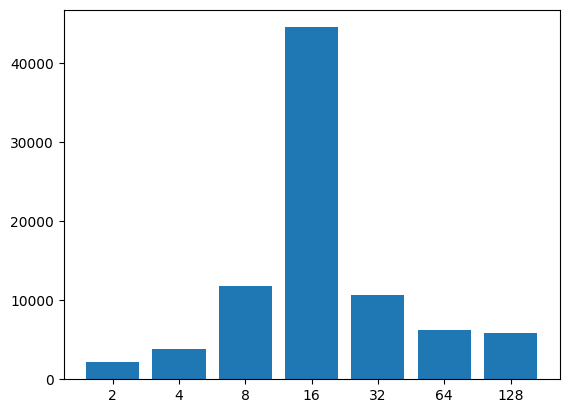

In [244]:
# Plotting iterations
plt.bar(['2', '4', '8', '16', '32', '64', '128'], [2134, 3804, 11773, 44574, 10629, 6283, 5810])

<BarContainer object of 7 artists>

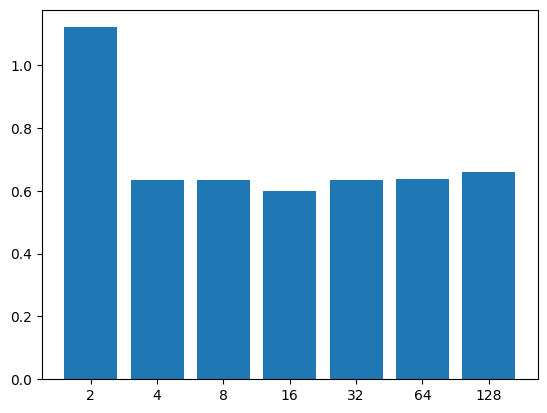

In [286]:
# Plotting performance
plt.bar(['2', '4', '8', '16', '32', '64', '128'], yhs_batch)

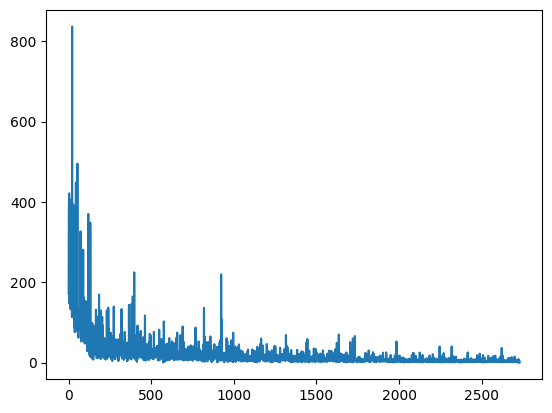

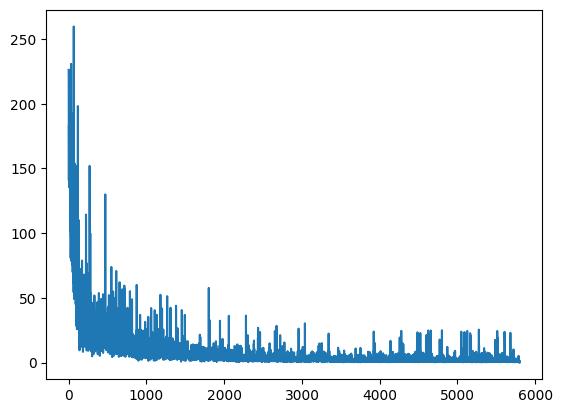

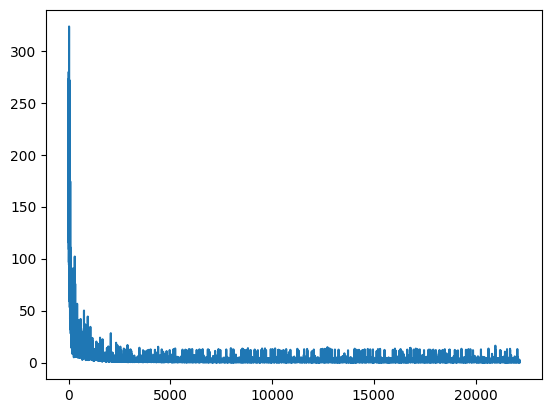

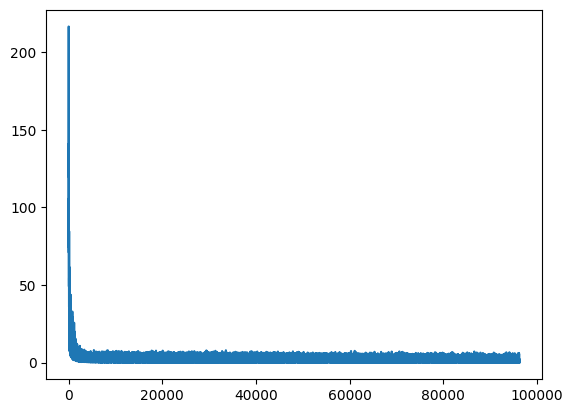

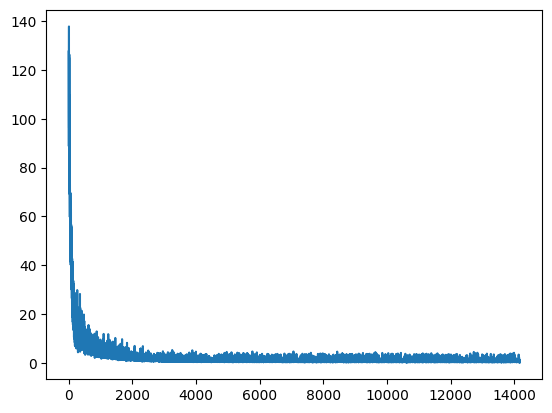

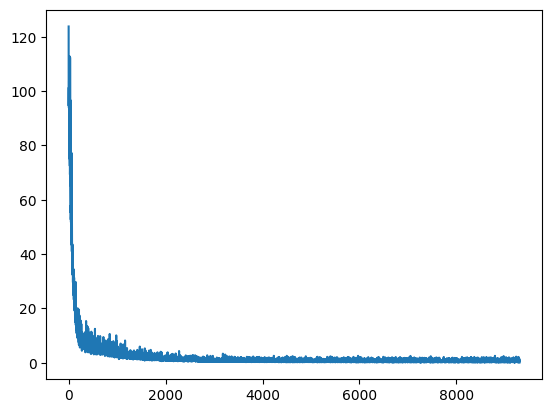

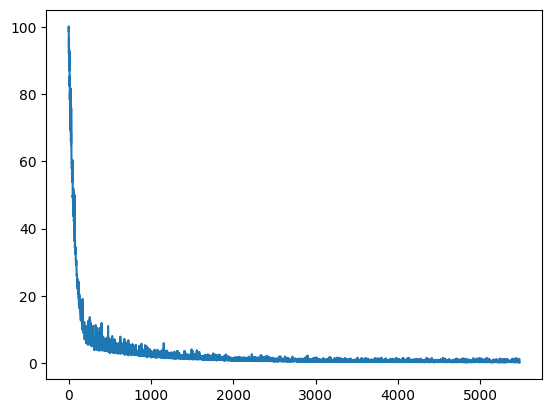

In [246]:
# Looking at norm of gradient
# much more stable starting at 32
for g in gss_batch:
  plt.plot(g)
  plt.show()

In [278]:
# Different learning rates
# Need to complete this

learning_rates = [.0001, .001, 0.01, 0.1]
yhs_lr = []
gss_lr = []
t_lr = []
n_iter_lr = []


for l in learning_rates:
  gs = []
  model = LinearRegression(learning_rate=l)
  model.fit(x_train, y_train, batch_size=64)
  yh = model.predict(x_test)
  yhs_lr.append((np.mean((y_test - yh) ** 2)) ** 0.5)
  gss_lr.append(gs)
  t_lr.append(model.time)
  n_iter_lr.append(model.num_iter)

Number of iterations: 100000
Time taken: 57.037972927093506 seconds
Number of iterations: 39533
Time taken: 21.754396438598633 seconds
Number of iterations: 4800
Time taken: 2.4786837100982666 seconds
Number of iterations: 629
Time taken: 0.32966017723083496 seconds


<ipython-input-266-43e71edf7868>:59: RuntimeWarning: overflow encountered in matmul
  g = 2 * x.T @ (yh - y) / x.shape[0]  # Compute the gradient
<ipython-input-266-43e71edf7868>:58: RuntimeWarning: invalid value encountered in matmul
  yh = x @ self.w  # Predicted values (y-hat) using current weights
<ipython-input-266-43e71edf7868>:59: RuntimeWarning: invalid value encountered in matmul
  g = 2 * x.T @ (yh - y) / x.shape[0]  # Compute the gradient


<BarContainer object of 4 artists>

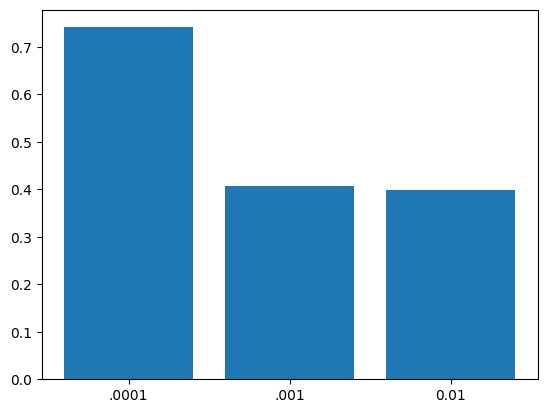

In [279]:
plt.bar(['.0001', '.001', '0.01', '0.1'], yhs_lr)

<BarContainer object of 4 artists>

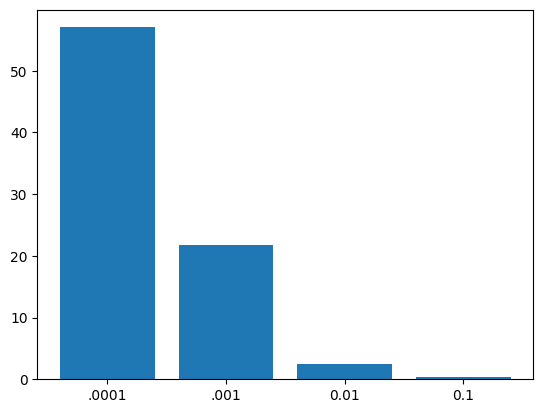

In [280]:
plt.bar(['.0001', '.001', '0.01', '0.1'], t_lr)

<BarContainer object of 4 artists>

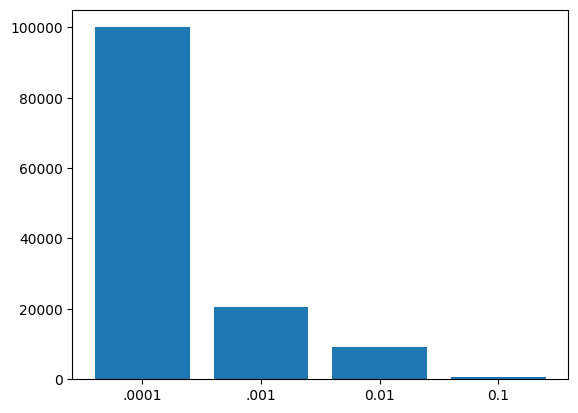

In [276]:
plt.bar(['.0001', '.001', '0.01', '0.1'], n_iter_lr)

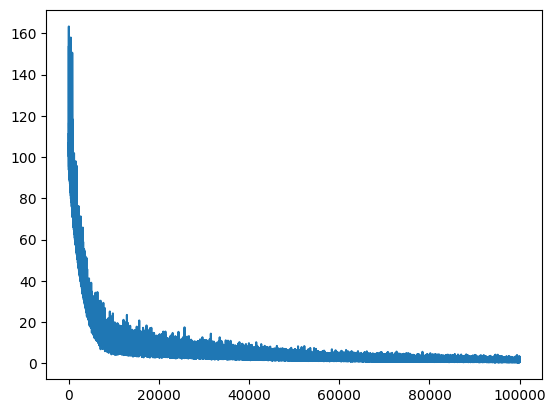

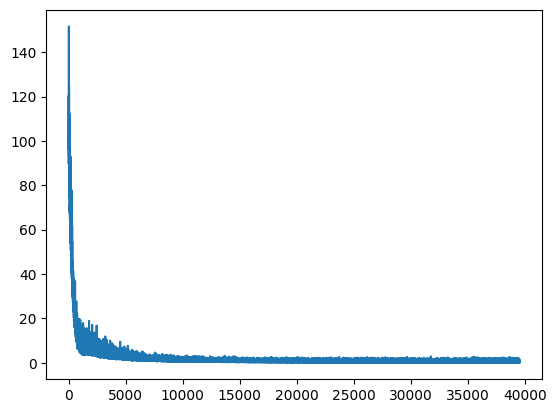

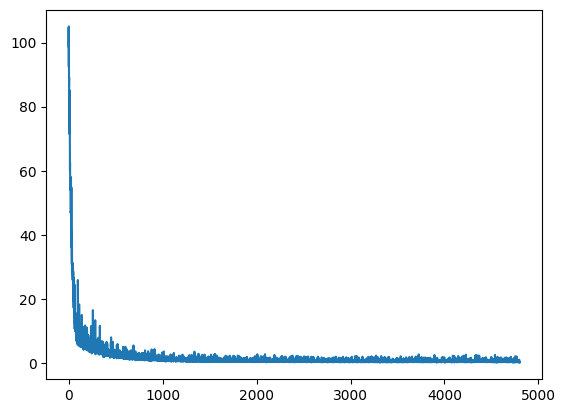

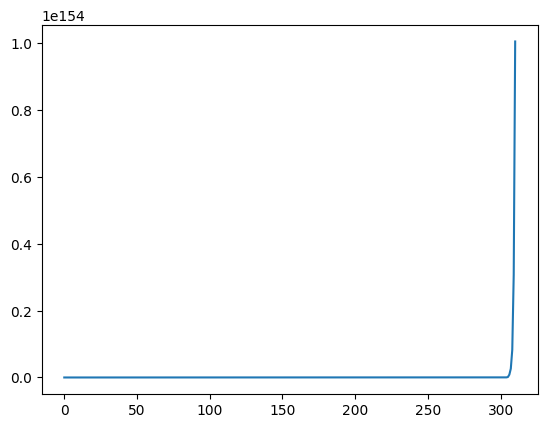

In [281]:
for g in gss_lr:
  plt.plot(g)
  plt.show()

In [292]:
# Analytical vs mini-batch
# Need to complete this

model = LinearRegression()
model.fit(x_train, y_train)
yh_analytical = model.predict(x_test)
t_analytical = model.time
yhs_batch.append((np.mean((y_test - yh_analytical) ** 2)) ** 0.5)
t_batch.append(t_analytical)


Time taken: 0.002264261245727539 seconds


<BarContainer object of 9 artists>

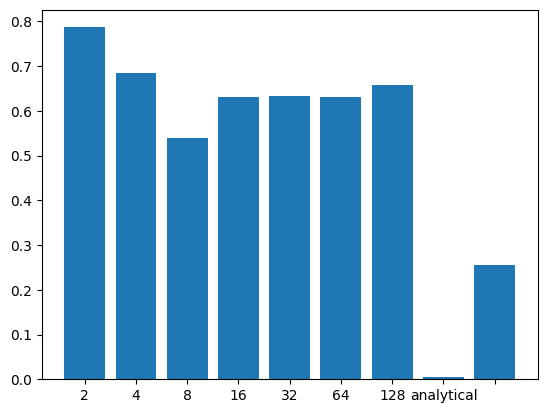

In [295]:
plt.bar(['2', '4', '8', '16', '32', '64', '128', 'analytical'], yhs_batch)


<BarContainer object of 9 artists>

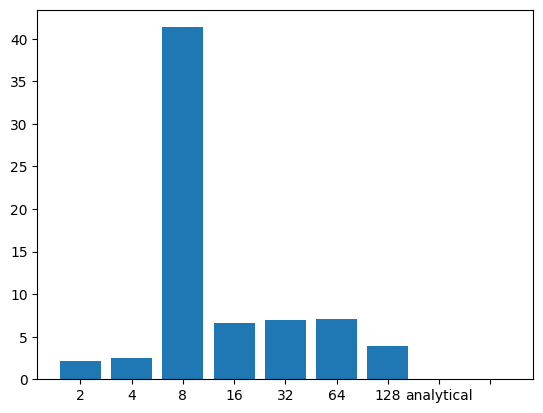

In [296]:
plt.bar(['2', '4', '8', '16', '32', '64', '128', 'analytical'], t_batch)

Compare analytical vs gradient solution

In [ ]:
class LinearRegression:
    def __init__(self, add_bias=True):
        self.add_bias = add_bias
        pass

    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]                         #add a dimension for the features
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])    #add bias by adding a constant feature of value 1
        #alternatively: self.w = np.linalg.inv(x.T @ x)@x.T@y
        self.w = np.linalg.lstsq(x, y, rcond=None)[0]  # Use rcond=None to avoid the warning
          #return w for the least square difference
        return self

    def predict(self, x):
        N = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(N)])
        yh = x@self.w                             #predict the y values
        return yh

import numpy as np

class MiniBatchLinearRegression:
    def __init__(self, learning_rate=0.01, n_epochs=1000, batch_size=32, add_bias=True):
        self.learning_rate = learning_rate
        self.n_epochs = n_epochs
        self.batch_size = batch_size
        self.add_bias = add_bias
        self.w = None

    def fit(self, x, y):
        # Ensure x is a 2D array (even if only one feature)
        if x.ndim == 1:
            x = x[:, None]

        N, n_features = x.shape

        # Add bias column (i.e., column of ones) if needed
        if self.add_bias:
            x = np.column_stack([x, np.ones(N)])

        # Initialize weights randomly
        self.w = np.random.randn(x.shape[1])

        # Training using mini-batch stochastic gradient descent
        for epoch in range(self.n_epochs):
            # Shuffle the data at the start of each epoch
            indices = np.random.permutation(N)
            x_shuffled = x[indices]
            y_shuffled = y[indices]

            # Iterate over mini-batches
            for i in range(0, N, self.batch_size):
                x_batch = x_shuffled[i:i+self.batch_size]
                y_batch = y_shuffled[i:i+self.batch_size]

                # Prediction using current weights
                y_pred = x_batch @ self.w

                # Calculate the gradient
                gradient = -2 * (x_batch.T @ (y_batch - y_pred)) / len(y_batch)

                # Update weights
                self.w -= self.learning_rate * gradient

        return self

    def predict(self, x):
        # Ensure x is a 2D array
        if x.ndim == 1:
            x = x[:, None]

        N = x.shape[0]

        # Add bias column if needed
        if self.add_bias:
            x = np.column_stack([x, np.ones(N)])

        # Prediction
        return x @ self.w

In [ ]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(x_train,y_train)
LinearRegression_model_pred_y = model.predict(x_test)
LinearRegression_model_pred_y_mse = np.mean((y_test - LinearRegression_model_pred_y) ** 2)

In [ ]:
MiniBatchLinearRegression_model = MiniBatchLinearRegression()
MiniBatchLinearRegression_model.fit(x_train,y_train)
MiniBatchLinearRegression_model_pred_y = model.predict(x_test)
MiniBatchLinearRegression_model_pred_y_mse = np.mean((y_test - MiniBatchLinearRegression_model_pred_y) ** 2)

In [ ]:
print('LinearRegression_model_pred_y_mse: ',LinearRegression_model_pred_y_mse,'MiniBatchLinearRegression_model_pred_y_mse: ',MiniBatchLinearRegression_model_pred_y_mse)

In [ ]:
# time and performance